In [1]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
import requests

url = "https://accounts.spotify.com/api/token"

headers = {"Content-Type": "application/x-www-form-urlencoded"}

data = {"grant_type": "client_credentials", "client_id": "d3d542b505d2433a81c7ab427116ec12",
        "client_secret": "ef29e62488f64a13b317ffedd4b07ac4"}

response = requests.post(url, headers=headers, data=data)

access_token = response.json()["access_token"]

print(access_token)

BQA5JFZh44wbMWGzzla_ze_RsRHjmV5NbstqDVYqJZx6C6K6z-mn9o9b5ccF1HUT2oXwknh8egmFNOLneI-Cj-UoFX8hCK4EJYwymdPjxYzohMxjWvk


In [3]:
playlist_genre = "Pop"
playlist_link = "https://open.spotify.com/playlist/3ZgmfR6lsnCwdffZUan8EA?si=377325b8d42e4d64"
# extract playlist id
playlist_id = re.search(r'playlist\/([A-Za-z0-9]*)?', playlist_link).group(1)

playlist_params = {"fields": "items(track(id))"}

playlist = requests.get("https://api.spotify.com/v1/playlists/{}/tracks".format(playlist_id),
                        headers={
                            "Authorization": "Bearer {}".format(access_token)
},
    params=playlist_params)

print(playlist)

<Response [200]>


In [7]:
df = pd.DataFrame(playlist.json())
print(df.head(5))

                                         items
0  {'track': {'id': '5jrdCoLpJSvHHorevXBATy'}}
1  {'track': {'id': '3s4U7OHV7gnj42VV72eSZ6'}}
2  {'track': {'id': '3cHyrEgdyYRjgJKSOiOtcS'}}
3  {'track': {'id': '1fh2TfUOtOoXEE8qQynYEC'}}
4  {'track': {'id': '27jdUE1EYDSXZqhjuNxLem'}}


In [8]:
# extract the track id from each row
df["track_id"] = df["items"].apply(lambda x: x["track"]["id"])

# make a list and put the track ids in it
track_ids = df["track_id"].tolist()

In [9]:
features_list = []

for track_id in track_ids:
    feature_params = {
        "fields": "(acousticness, danceability, energy, instrumentalness, liveness, speechiness, valence, tempo, loudness, mode, )"}

    features = requests.get("https://api.spotify.com/v1/audio-features/{}".format(track_id),
                            headers={
        "Authorization": "Bearer {}".format(access_token)
    },
        params=feature_params)

    features_list.append(features.json())

In [10]:
# make a dataframe from the list of json objects
features_df = pd.DataFrame(features_list)

In [11]:
features_df.head(1)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.645,0.585,6,-6.122,1,0.0513,0.00314,0.0,0.165,0.353,131.931,audio_features,5jrdCoLpJSvHHorevXBATy,spotify:track:5jrdCoLpJSvHHorevXBATy,https://api.spotify.com/v1/tracks/5jrdCoLpJSvH...,https://api.spotify.com/v1/audio-analysis/5jrd...,215672,4


In [12]:
# drop columns except for the ones we want
# columns_to_drop = ['valence', 'key', 'loudness', 'mode', 'tempo', 'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms', 'time_signature']
columns_to_drop = ['type', 'id',
                   'uri', 'track_href', 'analysis_url', 'duration_ms']
# features_df = fedf.drop(
# features_df.drop(    columns=[col for col in columns_to_drop if col in features_df.columns])
features_df.drop(columns=columns_to_drop, inplace=True)

features_df.head(1)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,0.645,0.585,6,-6.122,1,0.0513,0.00314,0.0,0.165,0.353,131.931,4


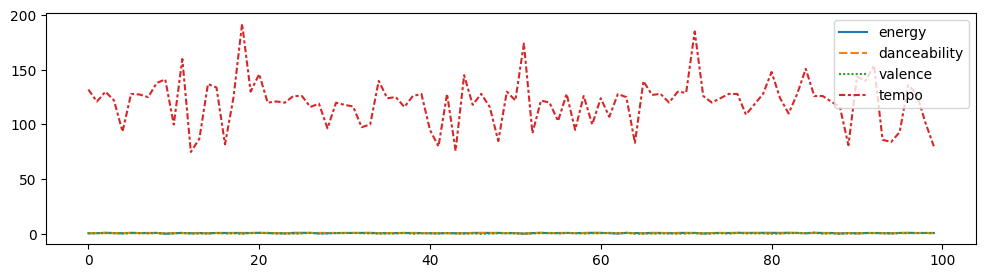

In [25]:
# make a line chart of selected features while keeping the y-axis from 0 to 1
figure = plt.figure(figsize=(12, 3))
sns.lineplot(
    data=features_df[["energy", "danceability", "valence", "tempo", ]])
plt.show()

In [97]:
# add a feature called genre and assign "R&B" to each row
features_df["genre"] = playlist_genre

In [98]:
features_df.to_csv(playlist_genre + "_2.csv", index=False)

d:\Classify-Song-Genres\.venv\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


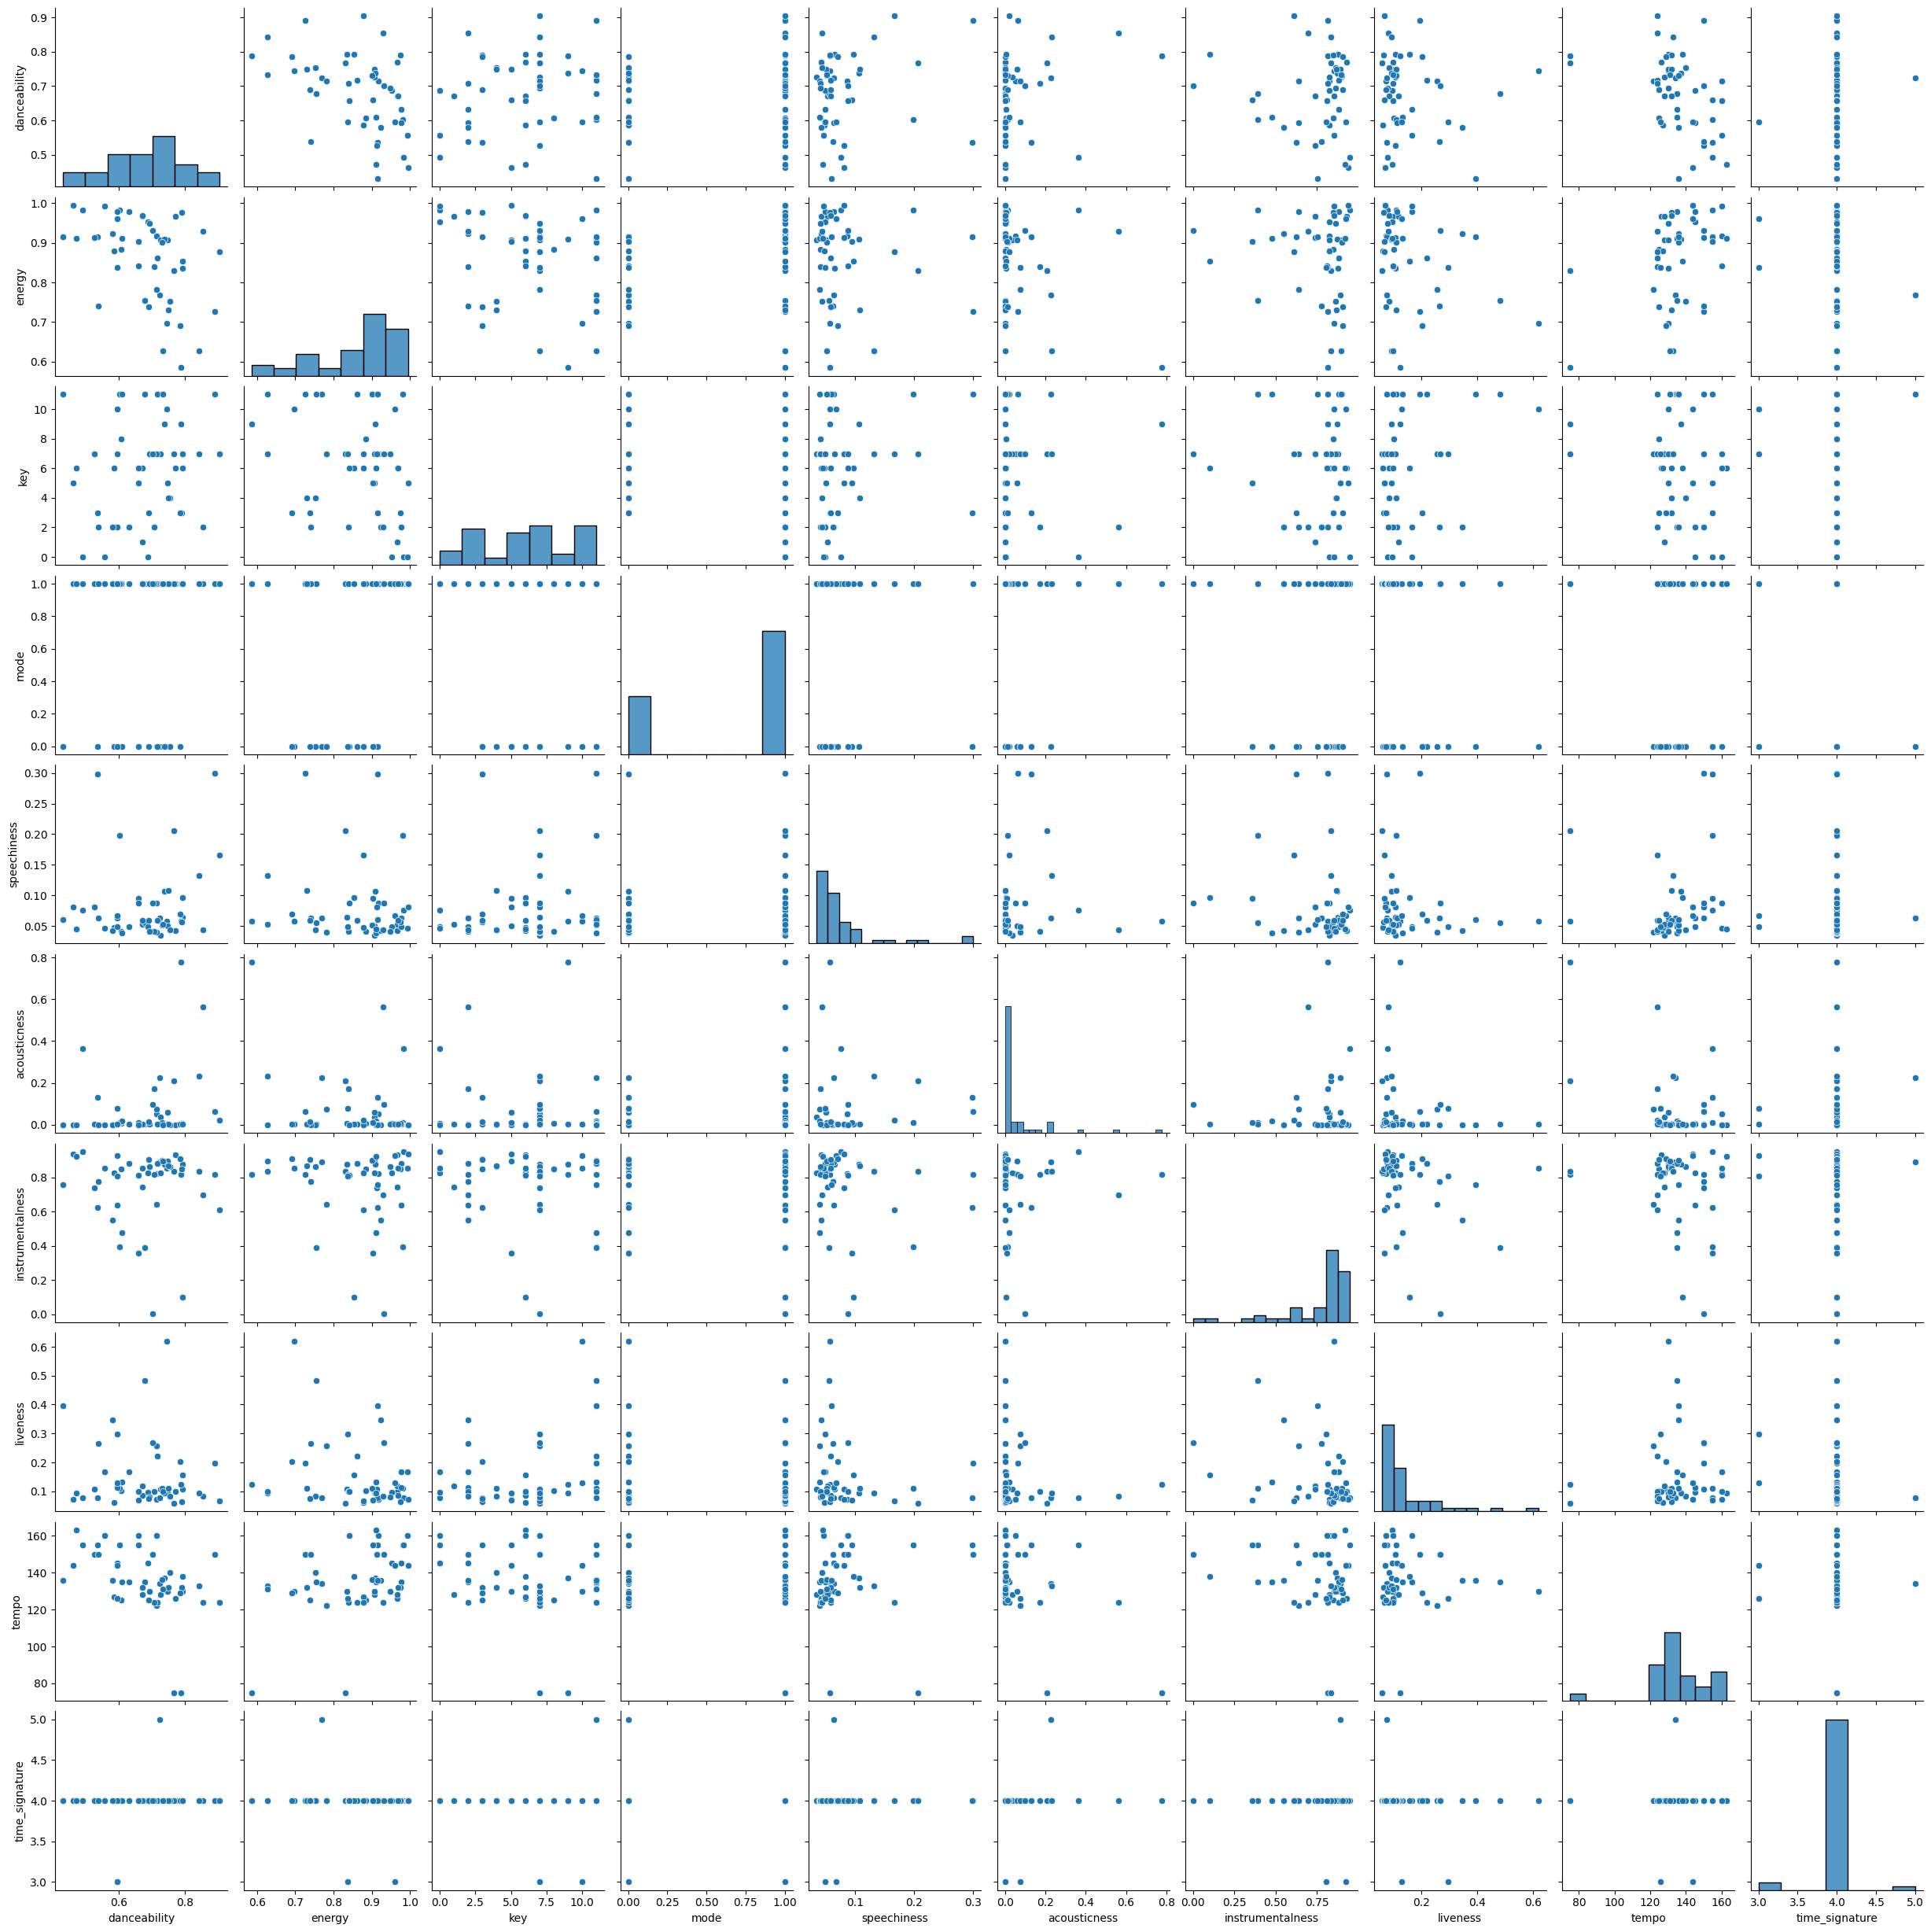

In [99]:
# make scatter plot of the dataframe
sns.pairplot(features_df)